In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

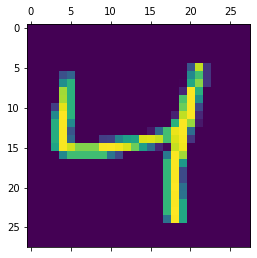

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [19]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [20]:
# stack of layers in neuronal network
model = keras.Sequential([
                  # all the neurons in the first layer will be connected with any other neuron in the second layer
                  # 10 neurons in the output, 784 neurons in the input
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4659 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9253


In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9247


[0.27159014344215393, 0.9247000217437744]

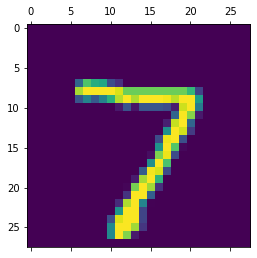

In [22]:
plt.matshow(X_test[0])

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.0878633e-02, 2.8222570e-07, 3.5575777e-02, 9.3265849e-01,
       2.5151968e-03, 9.4656497e-02, 1.0852712e-06, 9.9980426e-01,
       1.3502496e-01, 6.8763924e-01], dtype=float32)

In [27]:
np.argmax(y_predicted[0])

7

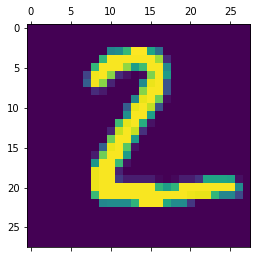

In [28]:
plt.matshow(X_test[1])

In [29]:
np.argmax(y_predicted[1])

2

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    5,    2,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   9,    9,  902,   18,    8,    5,   13,   12,   53,    3],
       [   4,    0,   14,  907,    0,   31,    3,   13,   29,    9],
       [   1,    1,    3,    2,  903,    0,   12,    5,   10,   45],
       [  11,    3,    1,   20,    9,  781,   15,    8,   37,    7],
       [  15,    3,    3,    2,    7,    8,  915,    2,    3,    0],
       [   1,    5,   20,    5,    5,    0,    0,  951,    4,   37],
       [   6,    6,    6,   15,    9,   19,    9,   11,  886,    7],
       [  10,    6,    1,    7,   22,    7,    0,   21,    9,  926]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

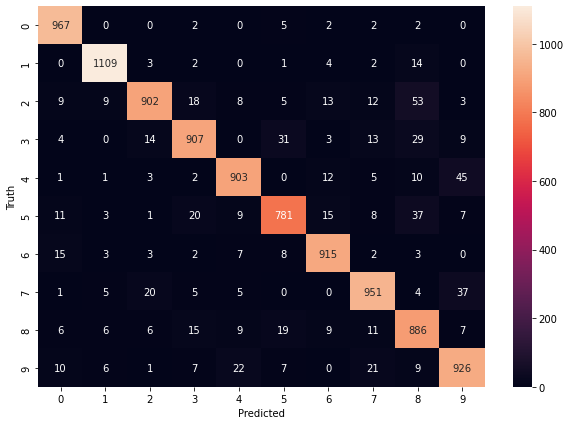

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2782 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1273 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0688 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9834


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0856 - accuracy: 0.9725


[0.08560238033533096, 0.9725000262260437]

Text(69.0, 0.5, 'Truth')

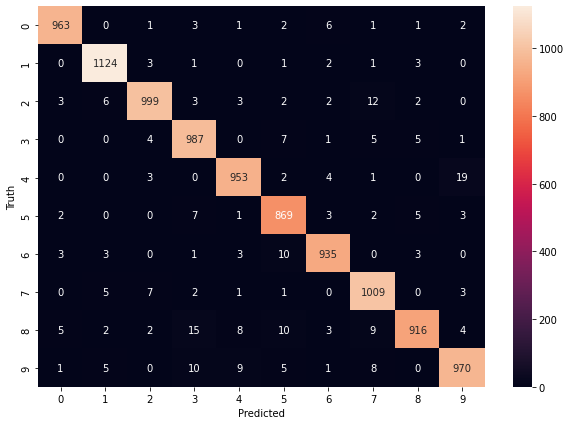

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(100, activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2751 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1257 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9837
